Handwritting Digits Recognition

In [1]:
import tensorflow as tf
import cv2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

C:\Users\enfan\OneDrive\Desktop\Handwritting_Digit\myenv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\enfan\OneDrive\Desktop\Handwritting_Digit\myenv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\enfan\OneDrive\Desktop\Handwritting_Digit\myenv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/f

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

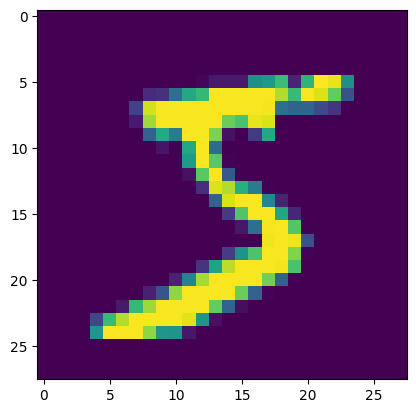

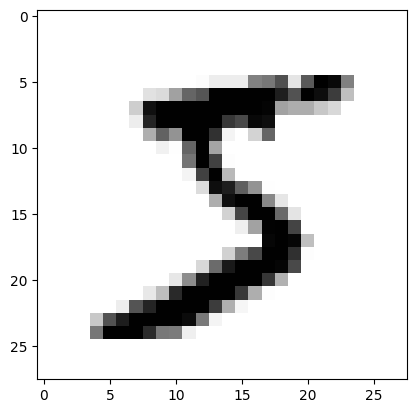

In [4]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])
plt.show()

plt.imshow(X_train[0], cmap = plt.cm.binary)

Checking values of each pixel

Before nomarlize

In [5]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Normalizing the data

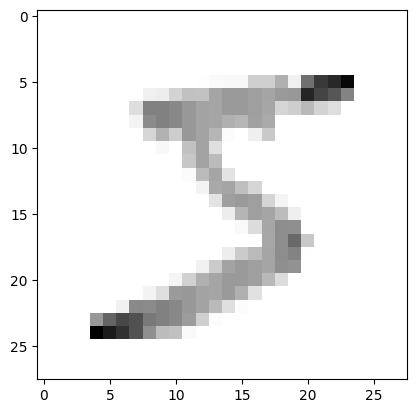

In [6]:
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)
plt.imshow(X_train[0], cmap = plt.cm.binary)

After normalize

In [7]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
print(y_train[0])

5


Resize image

In [9]:
import numpy as np
IMG_SIZE = 28
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


Deep Neural Network

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

model = Sequential()

#Ouput size = ((Input size-kernel size)/ Stride) +1
#1st conv 28-3+1 = 26x26 - stride=1, padding = 0
model.add(Conv2D(64, (3,3), input_shape = X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

#2nd conv 26-3+1
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

#3rd conv
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

#fc1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#fc2
model.add(Dense(32))
model.add(Activation("relu"))

#output
model.add(Dense(10))
model.add(Activation("softmax"))

C:\Users\enfan\OneDrive\Desktop\Handwritting_Digit\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)               │ (None, 26, 26, 64)    │          640 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ activation (Activation)       │ (None, 26, 26, 64)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 13, 13, 64)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_1 (Conv2D)             │ (None, 11, 11, 64)    │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ activation_1 (Activation)     │ (None, 11, 11, 64)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_1               │ (None, 5, 5, 64)      │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_2 (Conv2D)             │ (None, 3, 3, 64)      │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ activation_2 (Activation)     │ (None, 3, 3, 64)      │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_2               │ (None, 1, 1, 64)      │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten (Flatten)             │ (None, 64)            │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense (Dense)                 │ (None, 64)            │        4,160 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ activation_3 (Activation)     │ (None, 64)            │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 32)            │        2,080 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ activation_4 (Activation)     │ (None, 32)            │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_2 (Dense)               │ (None, 10)            │          330 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ activation_5 (Activation)     │ (None, 10)            │            0 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
print(len(X_train))

60000


In [13]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [14]:
model.fit(X_train,y_train,epochs=5,validation_split = 0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8977 - loss: 0.3210 - val_accuracy: 0.9576 - val_loss: 0.1423
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9669 - loss: 0.1075 - val_accuracy: 0.9734 - val_loss: 0.0852
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9771 - loss: 0.0761 - val_accuracy: 0.9723 - val_loss: 0.0872
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9805 - loss: 0.0621 - val_accuracy: 0.9789 - val_loss: 0.0729
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9843 - loss: 0.0500 - val_accuracy: 0.9767 - val_loss: 0.0807


Evaluating test set

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy: ", test_acc)
print("Test loss: ", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9764 - loss: 0.0767
Test accuracy:  0.9764000177383423
Test loss:  0.07667692005634308


In [16]:
predictions = model.predict([X_test])

116/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

C:\Users\enfan\OneDrive\Desktop\Handwritting_Digit\myenv\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(32, 28, 28, 1))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


C:\Users\enfan\OneDrive\Desktop\Handwritting_Digit\myenv\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(None, 28, 28, 1))',)
  warnings.warn(msg)


In [17]:
print(predictions)

[[2.23074630e-06 1.12742317e-04 1.20300963e-03 ... 9.98542666e-01
  7.74524142e-06 6.50478833e-05]
 [1.23606573e-04 1.04701542e-06 9.99870896e-01 ... 2.71443724e-07
  1.82665087e-06 1.18683076e-07]
 [8.17052751e-06 9.99580681e-01 9.63435286e-06 ... 9.31189279e-05
  3.18800339e-05 2.08872698e-05]
 ...
 [2.66828721e-07 1.62532615e-07 4.28302911e-07 ... 1.67205269e-06
  3.45747249e-05 6.58039280e-05]
 [1.64416106e-05 1.13318226e-08 4.60853888e-09 ... 1.05419096e-08
  1.03955332e-03 3.51161520e-06]
 [2.68985459e-04 2.76873448e-06 3.69517838e-05 ... 5.58832653e-06
  3.76140306e-05 1.39652011e-05]]


In [18]:
print(np.argmax(predictions[0]))

7


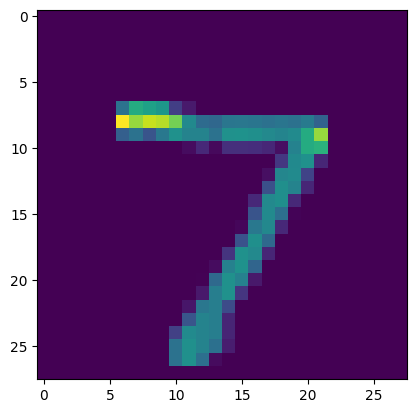

In [19]:
plt.imshow(X_test[0])

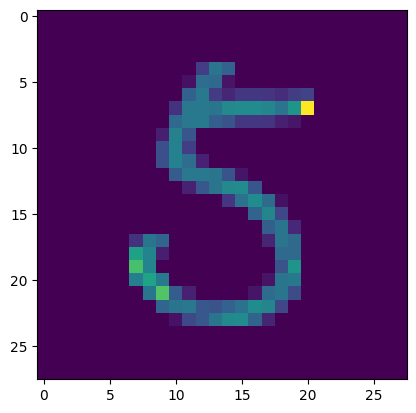

In [20]:
plt.imshow(X_test[153])

In [21]:
img = cv2.imread('3.png')

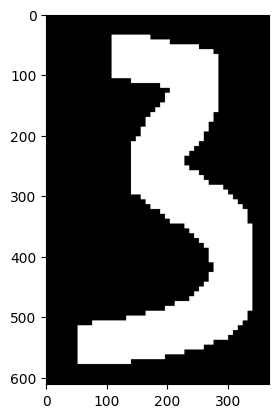

In [22]:
plt.imshow(img)

In [23]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)

In [24]:
img.shape

(611, 369, 3)

In [25]:
resized.shape

(28, 28)

In [26]:
new_img = tf.keras.utils.normalize(resized, axis =1)
new_img = np.array(new_img).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 

In [27]:
new_img.shape

(1, 28, 28, 1)

In [28]:
predictions = model.predict(new_img)
print(np.argmax(predictions))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
3


In [29]:
model.save('digit_recognition.h5')

In [30]:

def predict_digit(image_path, model, img_size=28, show_image=False):
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Không tìm thấy ảnh: {image_path}")

    if show_image:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.axis('off')
        plt.show()

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (img_size, img_size), interpolation=cv2.INTER_AREA)
    normalized = tf.keras.utils.normalize(resized, axis=1)
    input_img = normalized.reshape(-1, img_size, img_size, 1)
    predictions = model.predict(input_img)
    predicted_label = int(np.argmax(predictions))
    return predicted_label

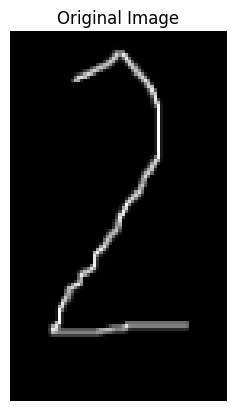

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted digit: 2


In [31]:
label = predict_digit('imgmoi.png', model, show_image=True)
print("Predicted digit:", label)
